# Домашняя работа №6
# Студент: Правилов Михаил

In [363]:
import numpy as np
import matplotlib.pyplot as plt

# Задание 1

"Вычислите матрицу Грама для базиса $1, x, ..., x^{n-1}$ в пространстве $L_2[0; 1]$."

$A_{ij} = <x^i; x^j> = \int_0^1{x^i\overline{x^j} dx} = \int_0^1{x^{i + j} dx} = \frac{1}{i + j + 1}x^{i + j + 1}|^1_0 = \frac{1}{i + j + 1}$

In [364]:
def get_A(N):
    def element(i, j):
        return 1 / (i + j + 1)
    return np.fromfunction(element, (N, N))

"С помощью метода прямых итераций найдите макс. собственное значение как функцию от n"

Сравниваться будем со встроенной в numpy функцией.

In [365]:
def get_max_eigenvalue_straight_iterations(A, k=100, u=None):
    if u is None:
        n = A.shape[0]
        u = np.ones(n)
    u_k = np.linalg.matrix_power(A, k) @ u
    u_k1 = A @ u_k
    return np.inner(u_k1, u_k) / np.inner(u_k, u_k)

def get_max_eigenvalue_straight_iterations_normalize(A, k=100, u=None):
    if u is None:
        n = A.shape[0]
        u = np.ones(n)
    for k in range(1, k + 1):
        u = A @ u
        u = u / np.linalg.norm(u)
    u_k = u
    u_k1 = A @ u_k
    return np.inner(u_k1, u_k) / np.inner(u_k, u_k)

def get_max_eigenvalue_numpy(A):
    return max(np.linalg.eig(A)[0])

A = get_A(3)
my_max_eig = get_max_eigenvalue_straight_iterations(A)
np_max_eig = get_max_eigenvalue_numpy(A)
print("My implementation: " + str(my_max_eig))
print("Numpy:             " + str(np_max_eig))

My implementation: 1.4083189271236543
Numpy:             1.4083189271236538


In [366]:
def draw_max_eig_from_n(max_eig_generator, N_min=1, N_max=500):
    data_x = [N for N in range(N_min, N_max + 1)]
    data_y = [N ** (max_eig_generator(get_A(N)) / 3) for N in range(N_min, N_max + 1)]
    plt.subplot(211)
    plt.plot(data_x, data_y)
    plt.ylabel("N ^ (max eigenvalue / 3)")
    plt.xlabel("N")

/home/mikhail/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/mikhail/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


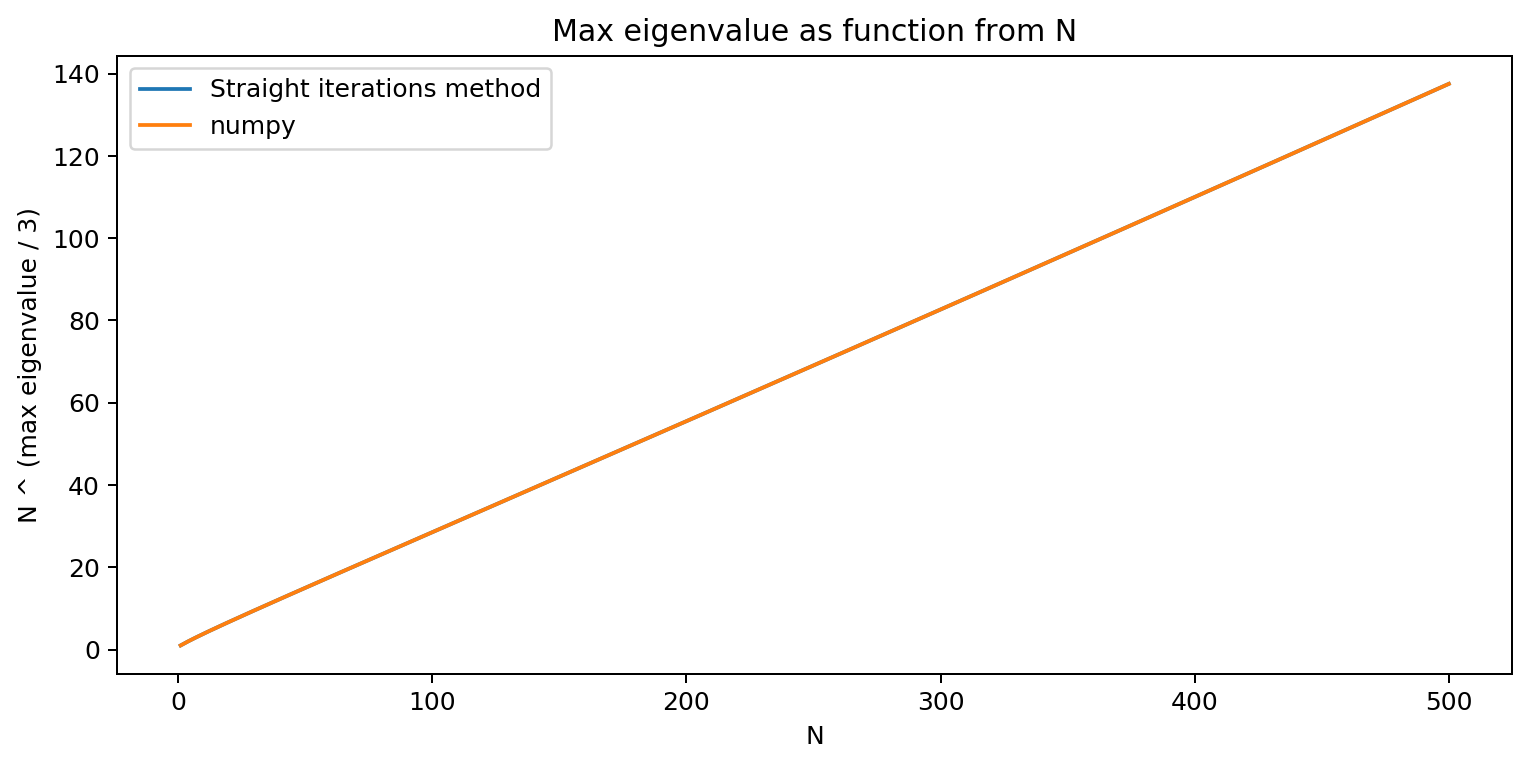

In [367]:
plt.figure(figsize=(10, 10), dpi=180)
draw_max_eig_from_n(get_max_eigenvalue_straight_iterations)
draw_max_eig_from_n(get_max_eigenvalue_numpy)
plt.title("Max eigenvalue as function from N")
plt.legend(("Straight iterations method", "numpy"))
plt.show()

Как видим графики совпадают, значит метод дает примерно такие же результаты, как и реализация numpy. 

Также масштаб $N^{y(N) / 3}$. Получившиеся прямая проходит через: $(500; 140); (1; 1)$. Поэтому ее уравнение $y = \frac{139}{499} x + \frac{360}{499}$

$N^{\frac{y(N)}{3}} = k * N + b \Leftrightarrow \frac{y(N)}{3} log(N) = log(k * N + b) \Leftrightarrow y(N) = \frac{3log(k * N + b)}{log(N)} = \frac{3log(\frac{139}{499} N + \frac{360}{499})}{log(N)}$

Таким образом максимальное собственное число зависит от N как отношение логарифмов.

"С помощью метода итераций со сдвигом постройте минимальное собственное значение как функцию от N"

Если нас просят минимальное, то надо взять $\alpha > \lambda_1$, так как мы уже умеем считать макс. собственное число, то можем взять $\alpha=\lambda + 0.00001$. Как показали мои эксперименты, лучше брать $\alpha$ как можно ближе к макс. собственному числу, так не возникает NaN и значения получаются более точными.

In [368]:
def get_min_eigenvalue_shift_normalized(A, alpha=None, k_straight=10000):
    N = A.shape[0]
    if alpha is None:
        alpha = get_max_eigenvalue_straight_iterations(A) + 0.00001
    A_shift = A - alpha * np.identity(N)
    return get_max_eigenvalue_straight_iterations_normalize(A_shift, k=k_straight) + alpha

def get_min_eigenvalue_shift(A, alpha=None, k_straight=500):
    N = A.shape[0]
    if alpha is None:
        alpha = get_max_eigenvalue_straight_iterations(A) + 0.00001
    A_shift = A - alpha * np.identity(N)
    return get_max_eigenvalue_straight_iterations(A_shift, k=k_straight) + alpha

def get_min_eigenvalue_numpy(A):
    return min(np.linalg.eig(A)[0])

In [369]:
A = get_A(3)
my_min_eig_shift = get_min_eigenvalue_shift(A)
np_min_eig = get_min_eigenvalue_numpy(A)
print("My implementation with shift: " + str(my_min_eig_shift))
print("Numpy:                        " + str(np_min_eig))

My implementation with shift: 0.0026873403557734488
Numpy:                        0.002687340355773522


In [370]:
def draw_min_eig_from_n(min_eig_generator, N_min=1, N_max=500):
    data_x = [N for N in range(N_min, N_max + 1)]
    data_y = [np.log10(min_eig_generator(get_A(N))) for N in range(N_min, N_max + 1)]
    plt.subplot(211)
    plt.plot(data_x, data_y)
    plt.ylabel("log(min eigenvalue)")
    plt.xlabel("N")

/home/mikhail/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/home/mikhail/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


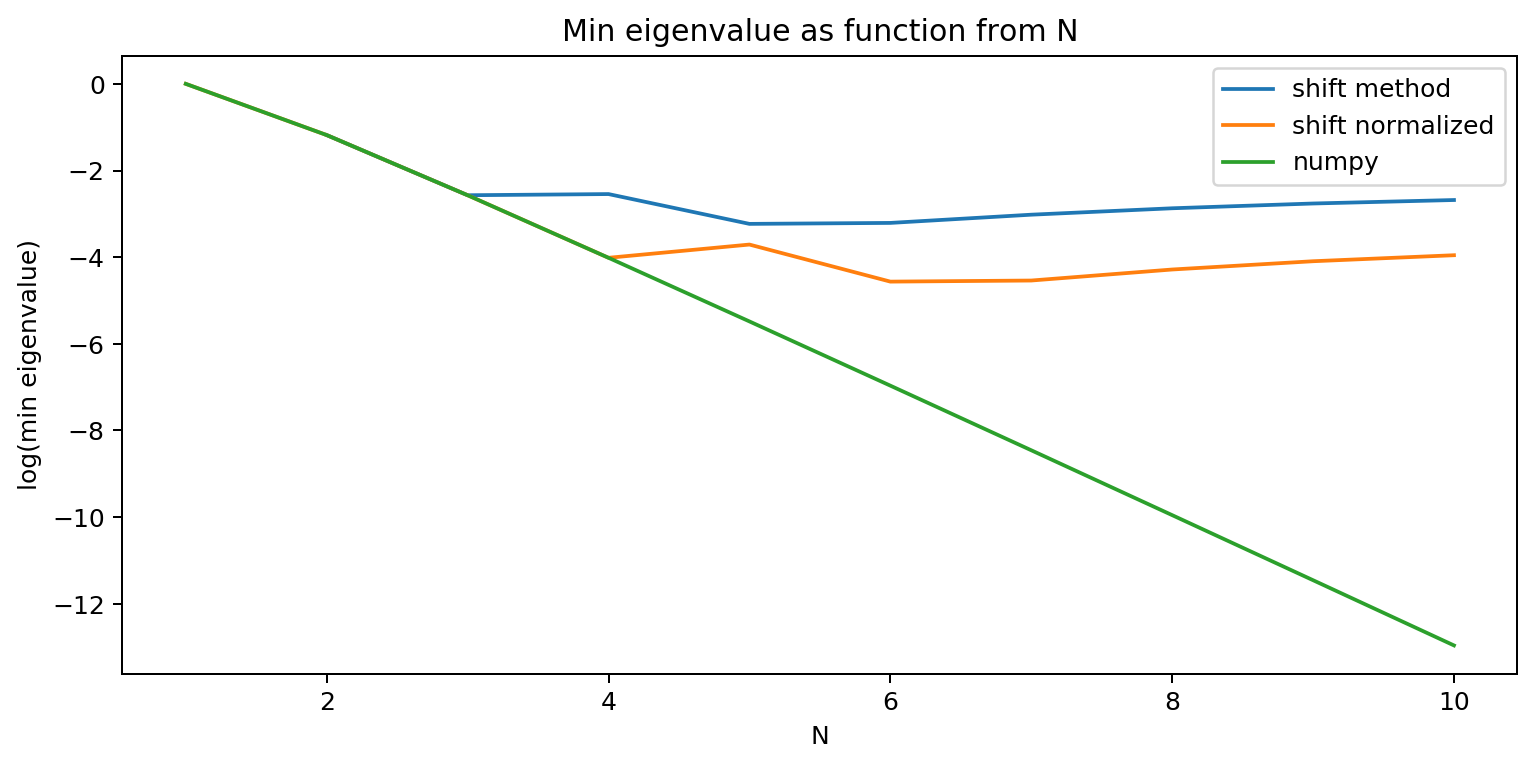

In [371]:
plt.figure(figsize=(10, 10), dpi=180)
draw_min_eig_from_n(get_min_eigenvalue_shift, 1, 10)
draw_min_eig_from_n(get_min_eigenvalue_shift_normalized, 1, 10)
draw_min_eig_from_n(get_min_eigenvalue_numpy, 1, 10)
plt.title("Min eigenvalue as function from N")
plt.legend(("shift method", "shift normalized", "numpy"))
plt.show()

Как видим значения после N=4 начинают сильно отличаться от numpy. С нормализацией все же лучше, чем без нее, так как можно поставить большее количество итераций. Хотя я применяю нормализацию, но и она не помогает при больших N. Связано это с плохой сходимостью метода сдвига (как и обсуждалось на лекции, что при поиске минимального собственного числа сходимость может быть крайне низкой, даже 10 тысяч итераций не помогает). 

При этом если не нормировать и взять количество итераций больше 500, то уже не хватает точности и мы получаем NaN.

"Постойте график спектрального числа обусловленности $\kappa(A) = |\frac{\lambda_{max}}{\lambda_{min}}|$ как функцию от n. Найдите численно примерную зависимость."

In [372]:
def get_kappa(A):
    return np.abs(get_max_eigenvalue_straight_iterations(A) / get_min_eigenvalue_shift_normalized(A))

In [373]:
A = get_A(3)
my_kappa = get_kappa(A)
np_kappa = np.linalg.cond(A)
print("My implementation: " + str(my_kappa))
print("Numpy:             " + str(np_kappa))

My implementation: 524.0567775860766
Numpy:             524.0567775860627


In [374]:
def draw_kappa_from_n(kappa_generator, N_min=1, N_max=500):
    data_x = [N for N in range(N_min, N_max + 1)]
    data_y = [np.log10(kappa_generator(get_A(N))) for N in range(N_min, N_max + 1)]
    plt.subplot(211)
    plt.plot(data_x, data_y)
    plt.ylabel("log (kappa value)")
    plt.xlabel("N")

/home/mikhail/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


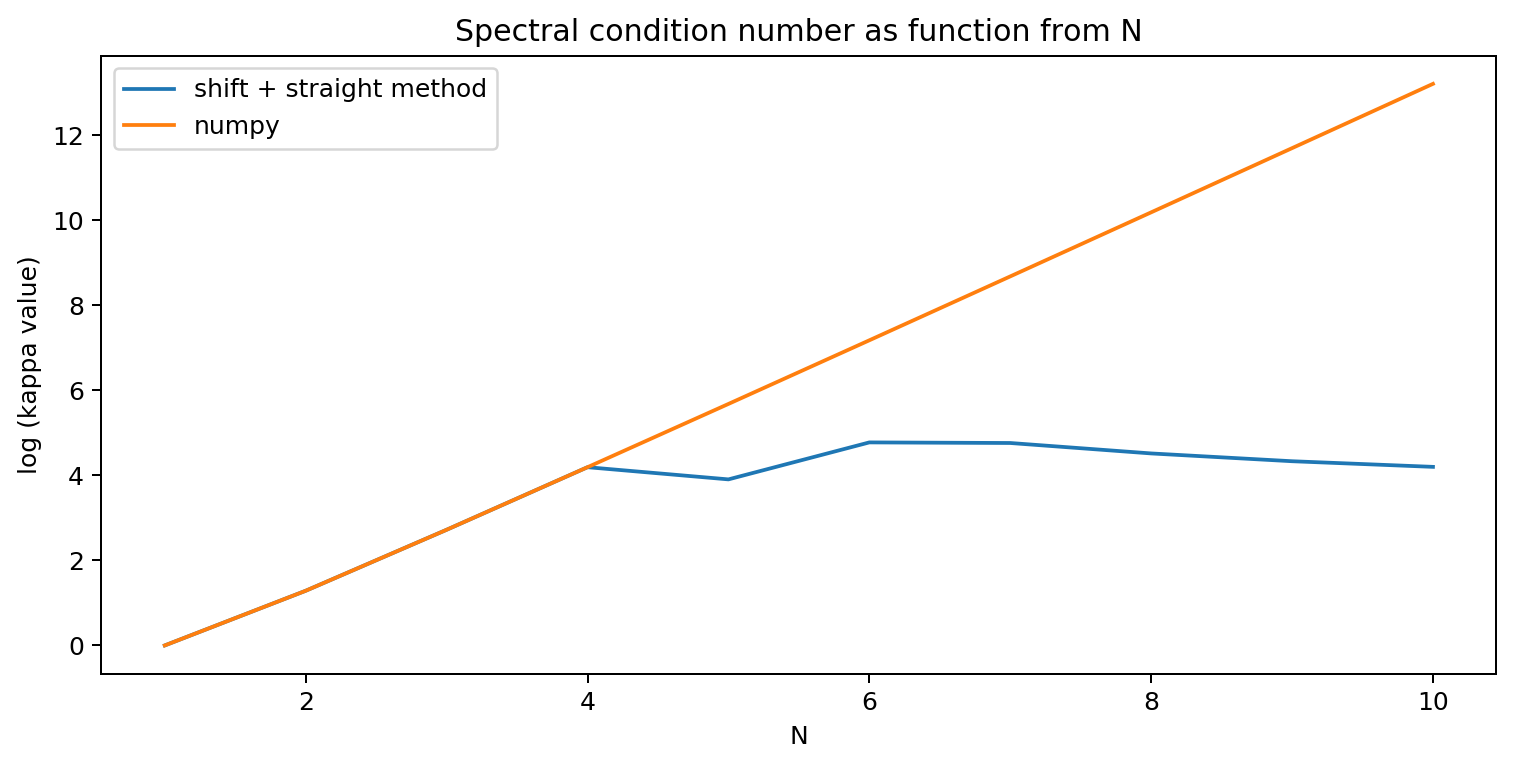

In [375]:
plt.figure(figsize=(10, 10), dpi=180)
draw_kappa_from_n(get_kappa, 1, 10)
draw_kappa_from_n(np.linalg.cond, 1, 10)
plt.title("Spectral condition number as function from N")
plt.legend(("shift + straight method", "numpy"))
plt.show()

Как видим спектральное число обусловленности матрицы тоже начинает сильно отличаться от numpy после четырех, что неудивительно раз у нас сильно отличались минимальные значения собственных чисел. 

Согласно numpy мы получаем прямую, значит зависимость $\kappa(A)$ растет, как степенная функция, примерно как $10^N$. Это согласуется с данными википедии, там зависимость $\kappa(A) = \frac{(1 + \sqrt{2})^{4N}}{\sqrt{N}}$

По нашему методу зависимость трудно отследить, но если рассматривать только N до 4 включительно, то тоже можно сделать вывод о степенной зависимости. Но на мой взгляд 4 слишком мало, 10 хотя бы надо. Если брать сильно больше 10, то там и numpy начнет ошибаться.

"Применить метод Эйткена ускорения сходимости при вычислениях в 2)"

In [376]:
def eitken(ys):
    s1, s2, s3 = ys
    return [ys[1], ys[2], s3 - (s3 - s2) ** 2 / (s3 - s2 - s2 + s1)]

In [377]:
def get_max_eigenvalue_straight_iterations_eitken(A, alpha, k=100, u=None):
    if u is None:
        n = A.shape[0]
        u = np.ones(n)
    elem = u
    s1 = np.inner(A @ elem, elem) / np.inner(elem, elem)
    elem = A @ elem
    s2 = np.inner(A @ elem, elem) / np.inner(elem, elem)
    elem = A @ elem
    s3 = np.inner(A @ elem, elem) / np.inner(elem, elem)
    res = s3 - (s3 - s2) ** 2 / (s3 - s2 - s2 + s1)
    for k in range(4, k + 1):
        s1 = s2
        s2 = s3
        elem = A @ elem
        s3 = np.inner(A @ elem, elem) / np.inner(elem, elem)
        if s3 - s2 - s2 + s1 != 0:
            res = s3 - (s3 - s2) ** 2 / (s3 - s2 - s2 + s1)
    return res

def get_min_eigenvalue_shift_eitken(A, alpha=None, k_straight=799):
    N = A.shape[0]
    if alpha is None:
        alpha = get_max_eigenvalue_straight_iterations(A) + 0.00001
    A_shift = A - alpha * np.identity(N)
    return get_max_eigenvalue_straight_iterations_eitken(A_shift, alpha, k=k_straight) + alpha

/home/mikhail/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/home/mikhail/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/mikhail/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/home/mikhail/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


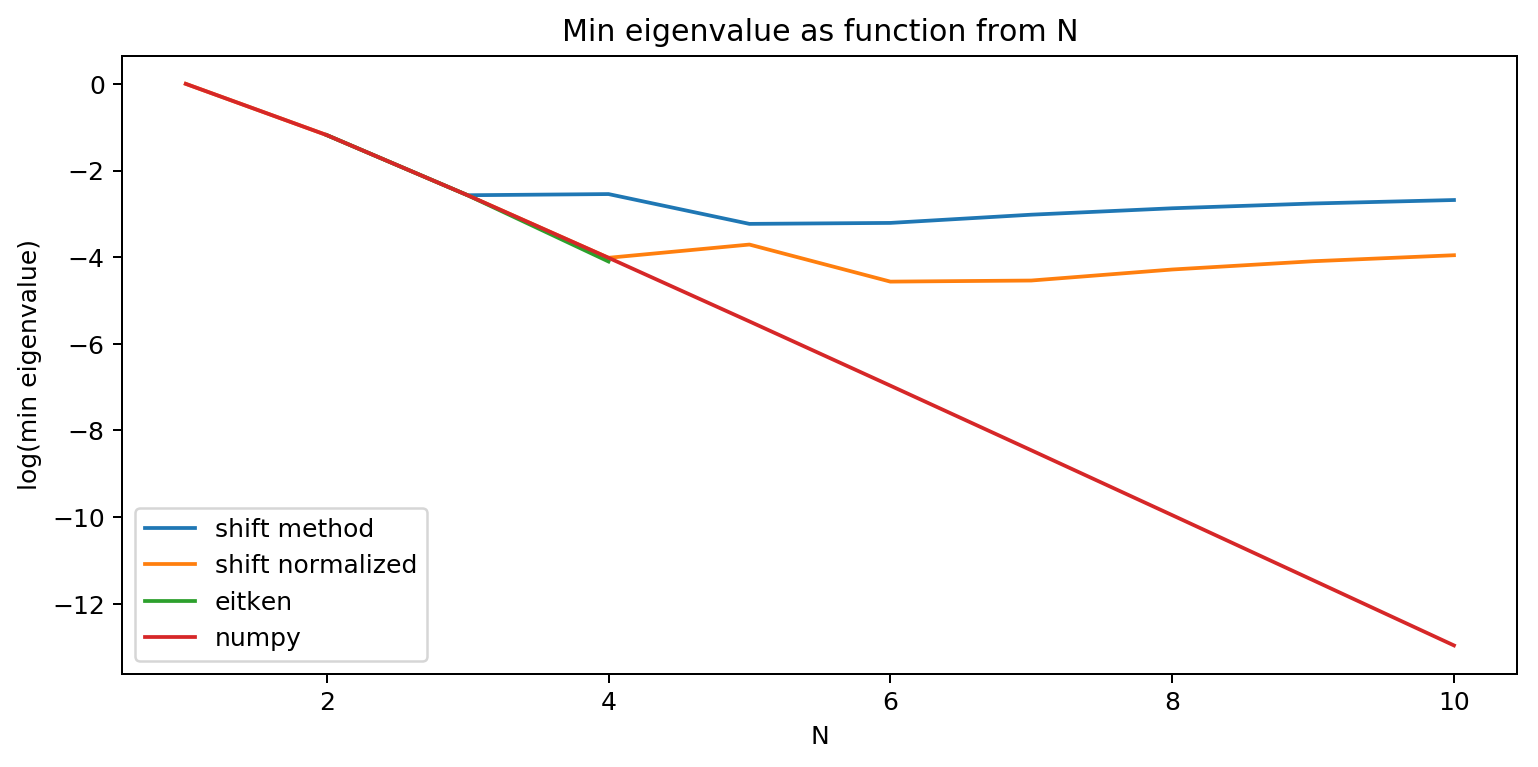

In [378]:
plt.figure(figsize=(10, 10), dpi=180)
draw_min_eig_from_n(get_min_eigenvalue_shift, 1, 10)
draw_min_eig_from_n(get_min_eigenvalue_shift_normalized, 1, 10)
draw_min_eig_from_n(get_min_eigenvalue_shift_eitken, 1, 10)
draw_min_eig_from_n(get_min_eigenvalue_numpy, 1, 10)
plt.title("Min eigenvalue as function from N")
plt.legend(("shift method", "shift normalized", "eitken", "numpy"))
plt.show()

Как видим Эйткен в сравнении со сдвигом без нормализации работает лучше, но в целом с нормализацией лучше, так как без нормализации Эйткен достаточно быстро получает NaN, но при этом дорабатывает нормально до момента, когда точность идет на спад.